##Imporing libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import sympy as sp

# Logistic regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

##Loading the dataset as dataframe using pandas

In [2]:
dataframe = pd.read_csv('/content/sample_data/heart disease classification dataset.csv')

##Handling missing values 

In [3]:
dataframe.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [4]:
dataframe.shape

(303, 15)

In [5]:
dataframe = dataframe[dataframe['trestbps'].notnull()]
dataframe = dataframe[dataframe['chol'].notnull()]
dataframe = dataframe[dataframe['thalach'].notnull()]
dataframe.shape

(293, 15)

Checking whether the values are in proper range or not. Deleting the values which are out of range. There are some values of 'ca' which are out of range. So deleting them from dataframe.

In [6]:
dataframe = dataframe.drop((dataframe[dataframe['ca'] > 3]).index, axis = 0)
dataframe.shape

(288, 15)

##Feature engineering. Introducing new column named angina which contains yes and no.

In [7]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

In [8]:
# Introducing new column named angina.
angina = []
cp = dataframe['cp'].to_list()
for i in range(len(dataframe)): 
  angina.append(1 if(cp[i]==1 or cp[i]==2) else 0)
dataframe['angina'] = angina

# Removing the unnamed column
dataframe = dataframe.drop(dataframe.columns[0], axis=1)

# Converting target into categorical value 
tg = dataframe['target'].to_list()
dataframe = dataframe.drop('target', axis=1)
target = []
for i in range(len(dataframe)): 
  target.append(1 if(tg[i]=='yes') else 0)
dataframe['target'] = target

# Converting sex into categorical value 
s = dataframe['sex'].to_list()
dataframe = dataframe.drop('sex', axis=1)
sex = []
for i in range(len(dataframe)): 
  sex.append(1 if(s[i]=='male') else 0)
dataframe['sex'] = sex

dataframe=df_column_switch(dataframe, 'target', 'sex')

dataframe.head(10)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,angina,sex,target
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,0,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0,1
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1,1
5,57,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,0,1,1
6,56,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,1,0,1
7,44,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,1,1,1
8,52,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1,1,1
9,57,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,1,1,1
10,54,0,140.0,239.0,0,1,160.0,0,1.2,2,0,2,0,1,1


##Splitting the dataset into features and labels.

In [9]:
x = dataframe.drop(columns=['target']) #feature
y = dataframe['target'] #label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)
print(x_train.shape)
print(x_test.shape)

(230, 14)
(58, 14)


# Calculating the accuracy using Logistic Regression

In [10]:
model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
model.fit(x_train, y_train) # 
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.8793103448275862


# Calculating the accuracy using Decision Tree

In [11]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.7241379310344828


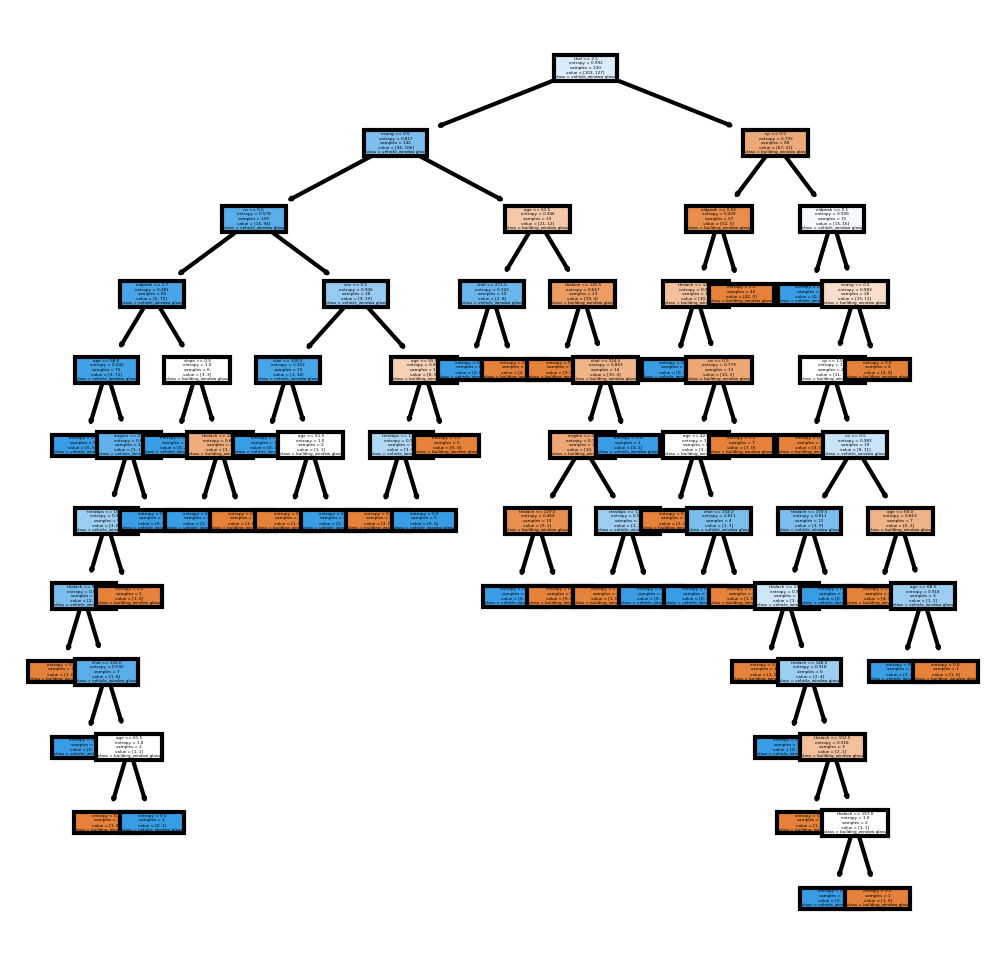

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(clf, feature_names = x.columns, class_names = ['building_window glass', 'vehicle_window glass', 'container glass',
 'tableware glass', 'headlamp glass'], filled = True);